<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/bps_tr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [37]:
import warnings

warnings.filterwarnings('ignore')

input

In [38]:
df = pd.read_csv("bps_tr.csv")

exploratory

In [39]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Lvl        1008 non-null   int64
 1   Gender     1008 non-null   int64
 2   Tenure     1008 non-null   int64
 3   KT         1008 non-null   int64
 4   longterm1  1008 non-null   int64
 5   longterm2  1008 non-null   int64
 6   longterm3  1008 non-null   int64
 7   Joined1    1008 non-null   int64
 8   Joined2    1008 non-null   int64
 9   Joined3    1008 non-null   int64
dtypes: int64(10)
memory usage: 78.9 KB


In [40]:
df.head()

,Lvl,Gender,Tenure,KT,longterm1,longterm2,longterm3,Joined1,Joined2,Joined3
0,1,0,3,1,1,2,4,6,13,9
1,0,1,1,1,4,2,1,9,7,30
2,0,0,4,0,0,4,1,13,30,6
3,1,1,4,1,2,1,6,6,7,30
4,0,0,1,1,1,2,8,6,7,13


checks

In [41]:
df.isnull().sum()
df.describe()

,Lvl,Gender,Tenure,KT,longterm1,longterm2,longterm3,Joined1,Joined2,Joined3
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,0.522817,0.623016,2.637897,0.554563,1.821429,3.428571,4.583333,8.781746,10.826389,12.322421
std,0.552574,0.484871,1.242588,0.497261,2.018745,2.846775,3.425328,5.607838,6.264020,6.695106
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,6.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,6.000000,7.000000,8.000000
50%,0.000000,1.000000,3.000000,1.000000,1.000000,2.000000,4.000000,7.000000,9.000000,10.000000
75%,1.000000,1.000000,4.000000,1.000000,2.000000,4.000000,8.000000,9.000000,13.000000,13.000000
max,2.000000,1.000000,4.000000,1.000000,20.000000,20.000000,20.000000,30.000000,30.000000,30.000000


In [42]:
X=df

Scaling

In [43]:
cols = X.columns

In [44]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [45]:
X = pd.DataFrame(X, columns=[cols])

In [46]:
X.head()

,Lvl,Gender,Tenure,KT,longterm1,longterm2,longterm3,Joined1,Joined2,Joined3
0,0.5,0.0,0.666667,1.0,0.05,0.10,0.157895,0.000000,0.291667,0.125000
1,0.0,1.0,0.000000,1.0,0.20,0.10,0.000000,0.125000,0.041667,1.000000
2,0.0,0.0,1.000000,0.0,0.00,0.20,0.000000,0.291667,1.000000,0.000000
3,0.5,1.0,1.000000,1.0,0.10,0.05,0.263158,0.000000,0.041667,1.000000
4,0.0,0.0,0.000000,1.0,0.05,0.10,0.368421,0.000000,0.041667,0.291667


In [47]:
X.dropna(inplace=True)
X

,Lvl,Gender,Tenure,KT,longterm1,longterm2,longterm3,Joined1,Joined2,Joined3
0,0.5,0.0,0.666667,1.0,0.05,0.10,0.157895,0.000000,0.291667,0.125000
1,0.0,1.0,0.000000,1.0,0.20,0.10,0.000000,0.125000,0.041667,1.000000
2,0.0,0.0,1.000000,0.0,0.00,0.20,0.000000,0.291667,1.000000,0.000000
3,0.5,1.0,1.000000,1.0,0.10,0.05,0.263158,0.000000,0.041667,1.000000
4,0.0,0.0,0.000000,1.0,0.05,0.10,0.368421,0.000000,0.041667,0.291667
...,...,...,...,...,...,...,...,...,...,...
1003,0.0,0.0,1.000000,1.0,0.15,0.10,0.000000,0.333333,0.083333,0.125000
1004,0.0,1.0,0.333333,0.0,0.00,0.05,0.052632,0.125000,0.041667,0.083333
1005,0.5,0.0,1.000000,1.0,0.05,0.10,0.105263,0.000000,0.041667,0.083333
1006,0.0,0.0,0.333333,1.0,0.10,0.45,0.000000,0.000000,0.041667,0.166667


K means

In [48]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [49]:
kmeans.cluster_centers_

array([[ 2.10467706e-01,  6.16926503e-01,  5.41945063e-01,
        -1.55431223e-15,  9.83296214e-02,  1.79287305e-01,
         1.94936115e-01,  1.22401633e-01,  2.03136600e-01,
         2.62527840e-01],
       [ 3.02325581e-01,  6.27906977e-01,  5.49194991e-01,
         1.00000000e+00,  8.52415027e-02,  1.65116279e-01,
         1.83504378e-01,  1.10688730e-01,  1.99463327e-01,
         2.64162194e-01]])

inertia

In [50]:
kmeans.inertia_

749.3991725017963

Elbow

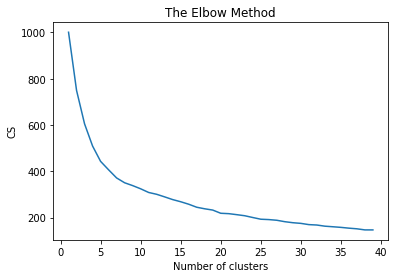

In [51]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

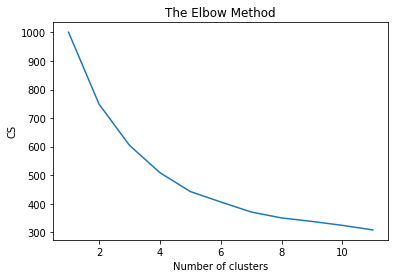

In [52]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [54]:
labels=kmeans.labels_
print(labels)

[3 2 4 ... 3 3 3]


In [55]:
Z=kmeans.cluster_centers_
Z

array([[ 4.56140351e-01,  1.00000000e+00,  9.98050682e-01,
         1.00000000e+00,  8.24561404e-02,  1.83040936e-01,
         1.81902124e-01,  9.60038986e-02,  1.83235867e-01,
         2.77777778e-01],
       [ 2.01834862e-01,  1.00000000e+00,  1.13149847e-01,
        -8.88178420e-16,  8.80733945e-02,  1.95412844e-01,
         2.02800579e-01,  1.02446483e-01,  1.98394495e-01,
         2.56116208e-01],
       [ 2.02777778e-01,  1.00000000e+00,  1.70370370e-01,
         1.00000000e+00,  8.16666667e-02,  1.53333333e-01,
         1.80409357e-01,  1.18287037e-01,  1.90972222e-01,
         2.07638889e-01],
       [ 2.62019231e-01, -3.33066907e-16,  5.08012821e-01,
         1.00000000e+00,  9.06250000e-02,  1.60576923e-01,
         1.87500000e-01,  1.16185897e-01,  2.20152244e-01,
         3.01883013e-01],
       [ 1.36627907e-01, -3.33066907e-16,  5.13565891e-01,
        -1.22124533e-15,  9.56395349e-02,  1.75581395e-01,
         1.74724602e-01,  1.26695736e-01,  2.09544574e-01,
         2.

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1008 samples in 0.003s...
[t-SNE] Computed neighbors for 1008 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1008
[t-SNE] Computed conditional probabilities for sample 1008 / 1008
[t-SNE] Mean sigma: 0.385941
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.610172
[t-SNE] KL divergence after 2500 iterations: 0.200755


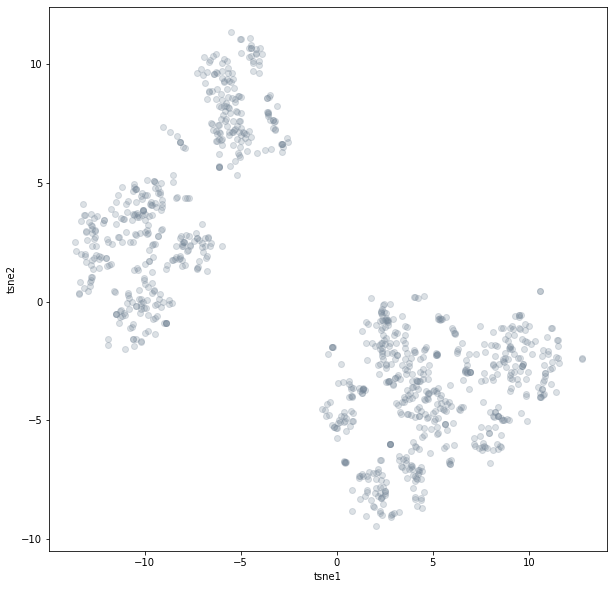

In [56]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [57]:
import matplotlib

In [58]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1008 samples in 0.002s...
[t-SNE] Computed neighbors for 1008 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1008
[t-SNE] Computed conditional probabilities for sample 1008 / 1008
[t-SNE] Mean sigma: 0.385941
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.330185
[t-SNE] KL divergence after 2000 iterations: 0.252961


In [59]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=int32)

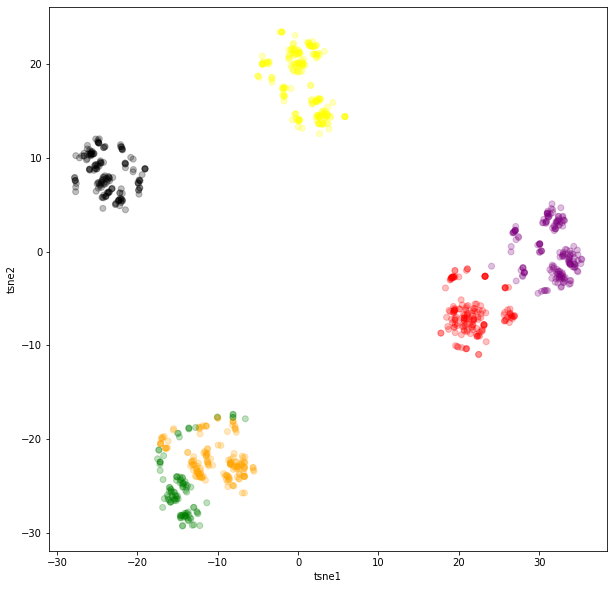

In [60]:
colors = ["red","green","blue","purple","yellow","cyan","black","orange"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [61]:
Z2 = ms.inverse_transform(Z)
Z2

array([[ 9.12280702e-01,  1.00000000e+00,  3.99415205e+00,
         1.00000000e+00,  1.64912281e+00,  3.66081871e+00,
         4.45614035e+00,  8.30409357e+00,  1.03976608e+01,
         1.26666667e+01],
       [ 4.03669725e-01,  1.00000000e+00,  1.33944954e+00,
        -8.88178420e-16,  1.76146789e+00,  3.90825688e+00,
         4.85321101e+00,  8.45871560e+00,  1.07614679e+01,
         1.21467890e+01],
       [ 4.05555556e-01,  1.00000000e+00,  1.51111111e+00,
         1.00000000e+00,  1.63333333e+00,  3.06666667e+00,
         4.42777778e+00,  8.83888889e+00,  1.05833333e+01,
         1.09833333e+01],
       [ 5.24038462e-01, -3.33066907e-16,  2.52403846e+00,
         1.00000000e+00,  1.81250000e+00,  3.21153846e+00,
         4.56250000e+00,  8.78846154e+00,  1.12836538e+01,
         1.32451923e+01],
       [ 2.73255814e-01, -3.33066907e-16,  2.54069767e+00,
        -1.22124533e-15,  1.91279070e+00,  3.51162791e+00,
         4.31976744e+00,  9.04069767e+00,  1.10290698e+01,
         1.